<a href="https://colab.research.google.com/github/guidolabela/POS_IA/blob/Modelos_Estatisticos/%5BPOS_IA%5DTransforma%C3%A7%C3%A3o_de_vari%C3%A1veis_com_Pyhton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformação de variáveis com Python

Importando bibliotecas necessárias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [4]:
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

## 1. Carregamento dos Dados

In [7]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/POS_IA/Modelos Estatisticos/adult.data.csv')

Mounted at /content/drive


In [9]:
# Remove espaços em branco nos nomes das colunas

dados.columns = dados.columns.str.strip()

# Remove espaços em branco dos valores das colunas de string

for col in dados.select_dtypes(include=['object']):

    dados[col] = dados[col].str.strip()

#### Visualizando o conjunto de dados

In [10]:
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Separação entre variáveis preditoras e alvo

In [11]:
variaveis_preditoras = dados.iloc[:, 0:14]
alvo = dados.iloc[:, 14]

As variáveis preditoras contêm todas as colunas exceto a última, que é a variável alvo.

In [12]:
variaveis_preditoras

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [13]:
alvo

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


## 3. Transformação da variável alvo com LabelEncoder

Converte rótulos categóricos ('<=50K', '>50K') em valores numéricos (0, 1)

In [14]:
encoder = LabelEncoder() # Vai transformar variaveis que não possuem valor numerico em valores numericos
alvo = encoder.fit_transform(alvo)

In [15]:
alvo

array([0, 0, 0, ..., 0, 0, 1])

### 🔴 Exemplo didático: LabelEncoder em variável categórica nominal

Contagem de valores da coluna 'workclass'

In [16]:
variaveis_preditoras['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
workclass_codificado = encoder.fit_transform(variaveis_preditoras['workclass'])
print("Valores codificados pela ordem alfabética:")
print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

Valores codificados pela ordem alfabética:
{'?': 0, 'Federal-gov': 1, 'Local-gov': 2, 'Never-worked': 3, 'Private': 4, 'Self-emp-inc': 5, 'Self-emp-not-inc': 6, 'State-gov': 7, 'Without-pay': 8}


⚠️ Por que é inadequado?
O LabelEncoder transforma categorias nominais em valores numéricos inteiros, o que pode induzir o modelo a interpretar uma relação ordinal onde ela não existe.

 Ex: 'Private' (4) pode parecer maior ou mais importante que 'Federal-gov' (1).
 Para variáveis categóricas nominais não dicotômicas, o correto é usar One-Hot Encoding.

Utilizar o `LabelEncoder` para transformar a variáveis dicotômicas, convertendo rótulos categóricos em valores numéricos.

## 4. Codificação de variáveis categóricas com One-Hot Encoding

In [18]:
# Exibe a contagem de categorias únicas da coluna 'workclass'
print(variaveis_preditoras['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


### Utilizando as variáveis DUMMY

In [20]:
one_hot = pd.get_dummies(data=variaveis_preditoras, columns=['workclass'])
#one_hot é mto comum ser usado para variaveis dummies

In [21]:
one_hot

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,...,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,False,False,False,False,False,False,False,True,False
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,False,False,False,False,False,False,True,False,False
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,United-States,False,False,False,False,True,False,False,False,False
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,United-States,False,False,False,False,True,False,False,False,False
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False


A codificação One-Hot cria colunas binárias para representar a presença ou ausência de categorias.

In [22]:
# Criando dummies para múltiplas colunas
one_hot_full = pd.get_dummies(data=variaveis_preditoras, columns=['workclass', 'education', 'marital-status',
                                                                  'occupation', 'relationship', 'race',
                                                                  'gender', 'native-country'])

In [23]:
one_hot_full

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Aplicando a codificação One-Hot para várias colunas categóricas ao mesmo tempo

## Escalonamento

## 1. Padronização dos Dados

Padronização é o processo de centralizar as variáveis em torno da média e escalá-las para ter desvio padrão 1.

In [24]:
variaveis_transformadas = variaveis_preditoras.select_dtypes(include='number')

scaler = StandardScaler()
padronizadas = scaler.fit_transform(variaveis_transformadas)
padronizadas = pd.DataFrame(padronizadas, columns=variaveis_transformadas.columns)
padronizadas

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [25]:
padronizadas.describe().round(2)  # resumo estatístico

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-1.68,-3.53,-0.15,-0.22,-3.19
25%,-0.78,-0.68,-0.42,-0.15,-0.22,-0.04
50%,-0.12,-0.11,-0.03,-0.15,-0.22,-0.04
75%,0.69,0.45,0.75,-0.15,-0.22,0.37
max,3.77,12.27,2.30,13.39,10.59,4.74


## 2. Normalização Min-Max
A normalização Min-Max escala as variáveis para um intervalo específico, geralmente [0, 1], útil para algoritmos sensíveis à escala dos dados

In [26]:
minmax = MinMaxScaler()
normalizadas = minmax.fit_transform(variaveis_transformadas)
normalizadas_df = pd.DataFrame(normalizadas, columns=variaveis_transformadas.columns)
normalizadas_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [28]:
normalizadas_df.describe().round(2)  # resumo estatístico
#Analise: O minimo passpu a ser zero (0) e o maximo passou a ser um (1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,0.30,0.12,0.61,0.01,0.02,0.40
std,0.19,0.07,0.17,0.07,0.09,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.15,0.07,0.53,0.00,0.00,0.40
50%,0.27,0.11,0.60,0.00,0.00,0.40
75%,0.42,0.15,0.73,0.00,0.00,0.45
max,1.00,1.00,1.00,1.00,1.00,1.00


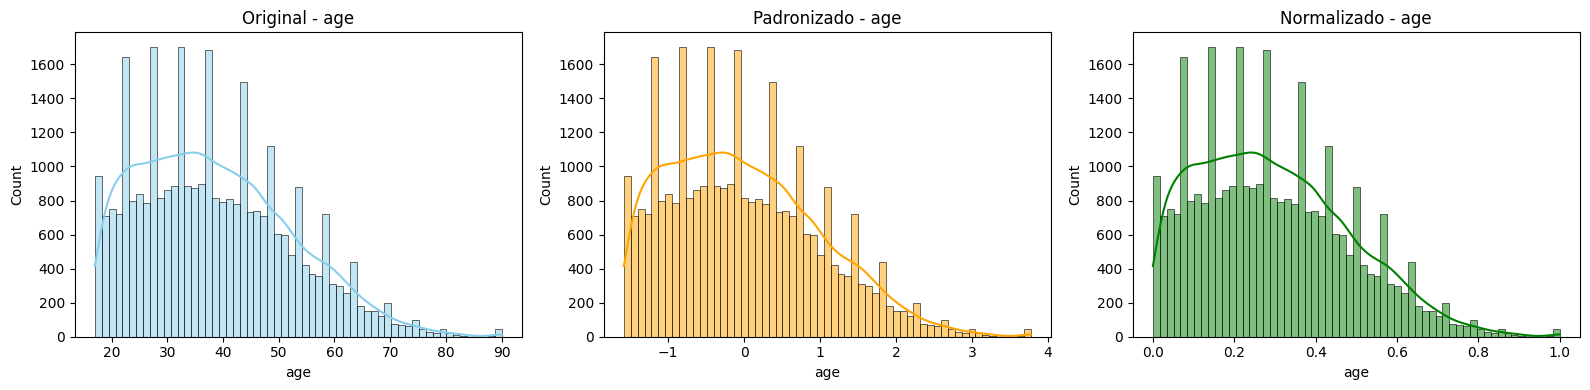

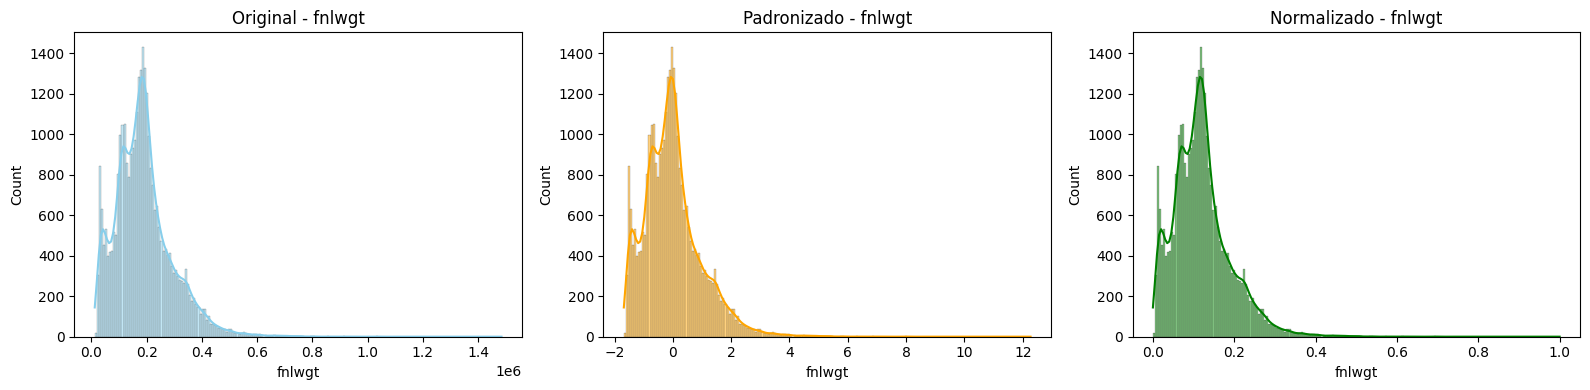

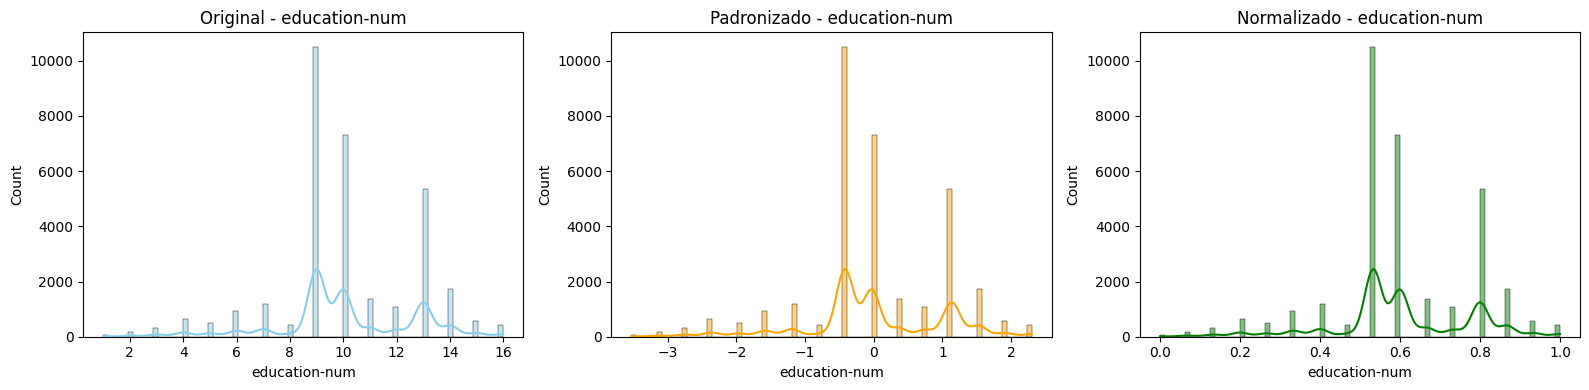

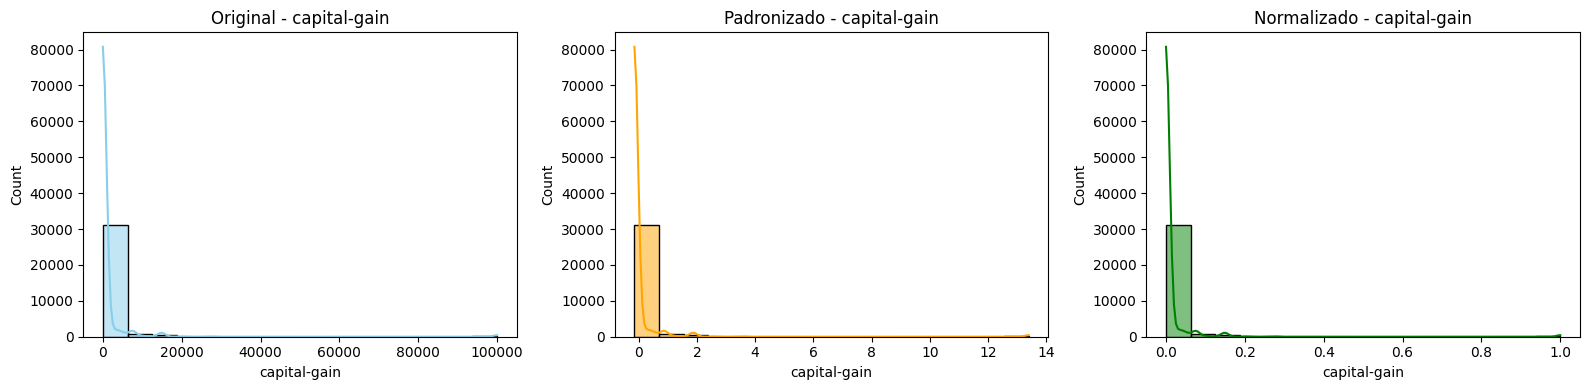

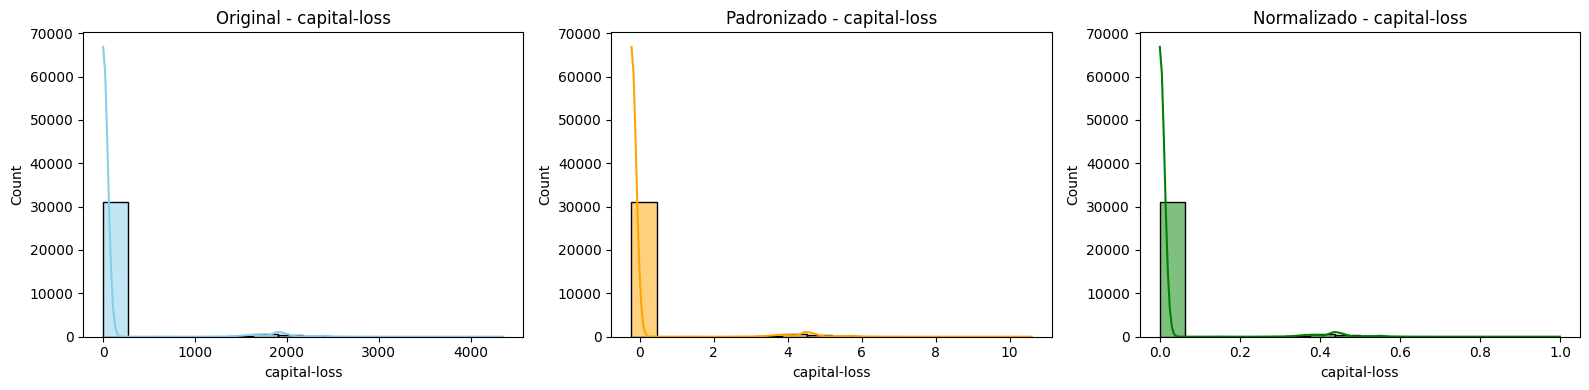

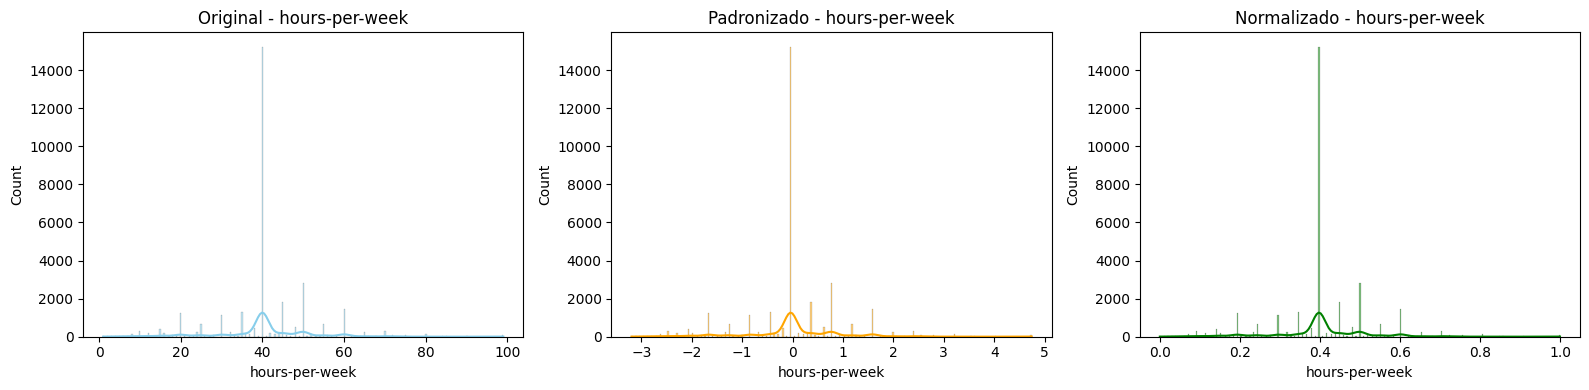

In [32]:
variaveis_numericas = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for var in variaveis_numericas:
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    sns.histplot(data=variaveis_transformadas, x=var, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Original - {var}")
    sns.histplot(data=padronizadas, x=var, kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f"Padronizado - {var}")
    sns.histplot(data=normalizadas_df, x=var, kde=True, ax=axes[2], color='green')
    axes[2].set_title(f"Normalizado - {var}")
    plt.tight_layout()
    plt.show()

Com essas etapas, cobrimos desde a transformação básica de variáveis categóricas até a padronização e normalização, preparando os dados para modelos de machine learning.